Importamos las librerias pandas, numpy y matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leemos el archivo csv.
Enlace: https://www.kaggle.com/datasets/rukenmissonnier/final-house


In [ ]:
archivo = pd.read_csv("/content/house.csv")
data = archivo
data.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4045 non-null   int64  
 1   net_sqm          4045 non-null   float64
 2   center_distance  4045 non-null   float64
 3   metro_distance   4045 non-null   float64
 4   floor            4045 non-null   int64  
 5   age              4045 non-null   int64  
 6   price            4045 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 221.3 KB


In [ ]:
data.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4045.000000,4045.000000,4045.000000,4045.000000,4045.00000,4045.000000,4045.000000
mean,3.649691,111.628225,1007.115236,89.412340,9.55822,48.360198,95733.956499
std,2.465720,89.459307,578.706749,71.000440,7.70210,28.153029,3770.581749
min,1.000000,-8.499109,10.060000,-168.492932,1.00000,0.000000,84153.485790
25%,2.000000,50.168622,510.630000,39.283508,2.00000,24.000000,93199.037388
50%,3.000000,86.381463,1009.410000,89.031988,8.00000,48.000000,95474.254973
75%,5.000000,144.767416,1493.410000,140.493035,16.00000,72.000000,97863.622299
max,17.000000,750.971604,1999.840000,330.275317,24.00000,97.000000,118134.771190


In [ ]:
data.corr()['price'].sort_values(ascending=False)

price              1.000000
net_sqm            0.734947
bedroom_count      0.568127
floor             -0.093950
metro_distance    -0.191751
age               -0.219934
center_distance   -0.472169
Name: price, dtype: float64

Preprocesamiento

---


Pasamos las columnas de int a float

In [ ]:
data['bedroom_count'] = data['bedroom_count'].astype(float)
data['age'] = data['age'].astype(float)
data['floor'] = data['floor'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4045 non-null   float64
 1   net_sqm          4045 non-null   float64
 2   center_distance  4045 non-null   float64
 3   metro_distance   4045 non-null   float64
 4   floor            4045 non-null   float64
 5   age              4045 non-null   float64
 6   price            4045 non-null   float64
dtypes: float64(7)
memory usage: 221.3 KB


Exploramos posibles mejores columnas

In [ ]:
data['bedrooms_floor'] = data['bedroom_count']/data['floor']
data['net_sqm_bedrooms'] = data['net_sqm']/data['bedroom_count']
data.corr()['price'].sort_values(ascending=False)

price               1.000000
net_sqm             0.734947
bedroom_count       0.568127
bedrooms_floor      0.440506
net_sqm_bedrooms    0.303028
floor              -0.093950
metro_distance     -0.191751
age                -0.219934
center_distance    -0.472169
Name: price, dtype: float64

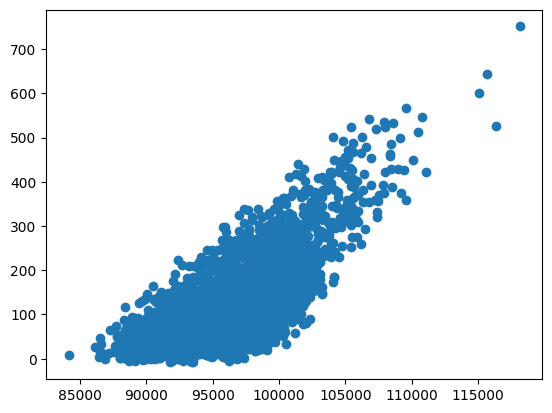

In [ ]:
plt.scatter(data['price'], data['net_sqm'])

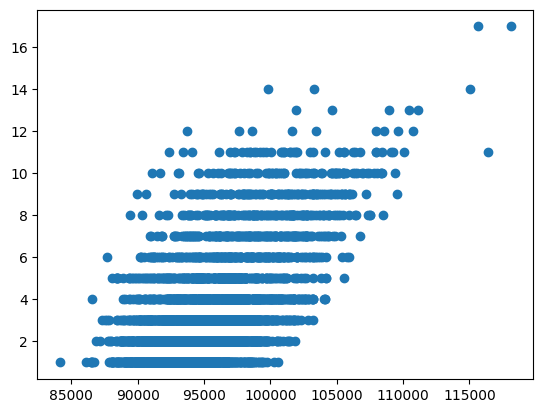

In [ ]:
plt.scatter(data['price'], data['bedroom_count'])
plt.show()

Segun la base de datos:

---


Net Square Meters (Net Sqm): Net square meters refer to the total usable interior space within the housing unit, excluding common areas like corridors and stairwells. It quantifies the size of the property.

---

Por lo tanto es imposible que sea de valores negativos, inclusive valores menores a 10 podrian ser imposibles

In [ ]:
data = data[data['net_sqm']>1]
data.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price,bedrooms_floor,net_sqm_bedrooms
count,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000
mean,3.664263,112.309087,1006.693198,89.321408,9.540662,48.340711,95757.095490,1.740230,32.051326
std,2.465622,89.289083,578.971748,71.052982,7.704857,28.156851,3764.177786,2.645201,14.289211
min,1.000000,1.246225,10.060000,-168.492932,1.000000,0.000000,84153.485790,0.041667,0.623112
25%,2.000000,50.801510,510.220000,39.257730,2.000000,23.000000,93241.271227,0.142857,20.704723
50%,3.000000,86.899908,1009.490000,88.940020,8.000000,48.000000,95506.679655,0.300000,31.863510
75%,5.000000,145.010116,1492.840000,140.425135,16.000000,72.000000,97884.737247,2.000000,42.610176
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190,17.000000,78.928158


Funciones para la regresion

---



In [ ]:
# Con el porcentaje de entrenamiento y los datos podemos hacer la division
# El primer elemento son los datos de entrenamiento
# Y el segundo elemento son los datos de prueba
# En este caso es una division aleatoria
def division_datos(entrenamiento, datos):
  entrenamiento = int(entrenamiento*len(data))
  prueba = len(data) - entrenamiento

  entrenamiento = data.sample(n=entrenamiento, random_state=1)
  prueba = data.drop(entrenamiento.index)

  return [entrenamiento,prueba]

In [ ]:
def Normalizar_entrenamiento(datos):
  min = datos.min().min()
  max = datos.max().max()
  datos = (datos - min) / (max - min)
  return datos, min, max

In [ ]:
def Normalizar(datos,min,max):
  return (datos - min) / (max - min)

In [ ]:
def prediccion (theta,datos):
  datos_ = datos.copy()
  datos_.insert(0, 'x0', 1)
  return np.dot(datos_,theta)

In [ ]:
def ECM (Y_test,predic):
  return ((Y_test - predic) ** 2).mean().values[0]

In [ ]:
def h0(x,theta):
  return np.dot(theta,x)

In [ ]:
def Regresion_lineal(columnas_entrada,columna_salida,iteraciones, aprendizaje):

  # Seteamos algunos parametros iniciales
  variables = columnas_entrada.shape[1] + 1
  theta = np.zeros(variables).reshape(variables,1) # Se le agrega el x0 = 1
  cantidad_datos = columnas_entrada.shape[0]
  y = columna_salida.values
  x = columnas_entrada.copy()
  x.insert(0, 'x0', 1)
  x = x.values

  # Realizamos el entrenamiento

  while iteraciones:
    iteraciones -= 1

    # Entrenamos cada theta
    for O in range(theta.shape[0]):

      costo = sum( (h0(theta,x)-y) * x[:,O].reshape(-1,1))
      theta[O] -= (aprendizaje / cantidad_datos) * costo

  return theta.reshape(variables,1)

In [ ]:
def Reg_Matrix(x_,y):
  x = x_.copy()
  x.insert(0, 'x0', 1)
  theta = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
  return theta

Seleccionamos las columas de entrada y salida

In [ ]:
columnas_entrada = ['net_sqm','bedroom_count']
columna_salida = ['price']

In [ ]:
data = data[columnas_entrada + columna_salida]
data

,net_sqm,bedroom_count,price
0,26.184098,1.0,96004.804557
1,34.866901,1.0,92473.722568
2,36.980709,1.0,98112.519942
3,17.445723,1.0,92118.326874
4,52.587646,1.0,98976.653176
...,...,...,...
4040,600.285032,14.0,115050.425194
4041,242.912020,14.0,99862.768731
4042,381.986238,14.0,103316.062406
4043,750.971604,17.0,118134.771190


Experimentos

---
Dividimos los datos

In [ ]:
exp_1 = division_datos(entrenamiento = 0.7, datos = data)
exp_2 = division_datos(entrenamiento = 0.5, datos = data)
exp_3 = division_datos(entrenamiento = 0.3, datos = data)

Normalizamos

In [ ]:
exp_1[0], min1, max1 = Normalizar_entrenamiento(exp_1[0])
exp_2[0], min2, max2 = Normalizar_entrenamiento(exp_2[0])
exp_3[0], min3, max3 = Normalizar_entrenamiento(exp_3[0])

In [ ]:
exp_1[1] = Normalizar(exp_1[1], min1, max1)
exp_2[1] = Normalizar(exp_2[1], min2, max2)
exp_3[1] = Normalizar(exp_3[1], min3, max3)

In [ ]:
exp_1[0].describe()

,net_sqm,bedroom_count,price
count,2814.000000,2814.000000,2814.000000
mean,0.000935,0.000022,0.810777
std,0.000749,0.000021,0.031689
min,0.000002,0.000000,0.712349
25%,0.000416,0.000008,0.789535
50%,0.000728,0.000017,0.808889
75%,0.001210,0.000034,0.828729
max,0.006348,0.000135,1.000000


In [ ]:
exp_1[1].describe()

,net_sqm,bedroom_count,price
count,1207.000000,1207.000000,1207.000000
mean,0.000960,0.000023,0.810099
std,0.000771,0.000021,0.032275
min,0.000002,0.000000,0.728941
25%,0.000433,0.000008,0.788519
50%,0.000726,0.000017,0.807815
75%,0.001258,0.000034,0.828458
max,0.004623,0.000110,0.937681


In [ ]:
data.mean()

net_sqm            112.309087
bedroom_count        3.664263
price            95757.095490
dtype: float64

In [ ]:
exp_1[0].mean()

net_sqm          0.000935
bedroom_count    0.000022
price            0.810777
dtype: float64

In [ ]:
exp_2[0].mean()

net_sqm          0.000940
bedroom_count    0.000022
price            0.811317
dtype: float64

In [ ]:
exp_3[0].mean()

net_sqm          0.000938
bedroom_count    0.000022
price            0.823359
dtype: float64

Entrenamos la regresion lineal

In [ ]:
X_1 = exp_1[0][columnas_entrada]
Y_1 = exp_1[0][columna_salida]
X_2 = exp_2[0][columnas_entrada]
Y_2 = exp_2[0][columna_salida]
X_3 = exp_3[0][columnas_entrada]
Y_3 = exp_3[0][columna_salida]
theta_1 = Reg_Matrix(X_1,Y_1)
theta_2 = Reg_Matrix(X_2,Y_2)
theta_3 = Reg_Matrix(X_3,Y_3)
theta_1

array([[  0.78169554],
       [ 31.6585188 ],
       [-22.8648236 ]])

In [ ]:
theta_1_1 = Regresion_lineal(X_1,Y_1,20,0.8)
theta_1_1

array([[8.10776525e-01],
       [4.31528445e-04],
       [9.57729931e-06]])

Testeamos el modelo

In [ ]:
X_1 = exp_1[1][columnas_entrada]
Y_1 = exp_1[1][columna_salida]
X_2 = exp_2[1][columnas_entrada]
Y_2 = exp_2[1][columna_salida]
X_3 = exp_3[1][columnas_entrada]
Y_3 = exp_3[1][columna_salida]

In [ ]:
Y_1_pred = prediccion(theta_1, X_1)
ecm_valor = ECM(Y_1_pred, Y_1)
ecm_valor

0.0004908898075831478

In [ ]:
Y_1_1_pred = prediccion(theta_1_1, X_1)
ecm_valor = ECM(Y_1_1_pred, Y_1)
ecm_valor

0.0010412858812501673

In [ ]:
Y_2_pred = prediccion(theta_2, X_2)
ecm_valor = ECM(Y_2_pred, Y_2)
ecm_valor

0.0004759395804004128

In [ ]:
Y_3_pred = prediccion(theta_3, X_3)
ecm_valor = ECM(Y_3_pred, Y_3)
ecm_valor

0.0004892193848408522

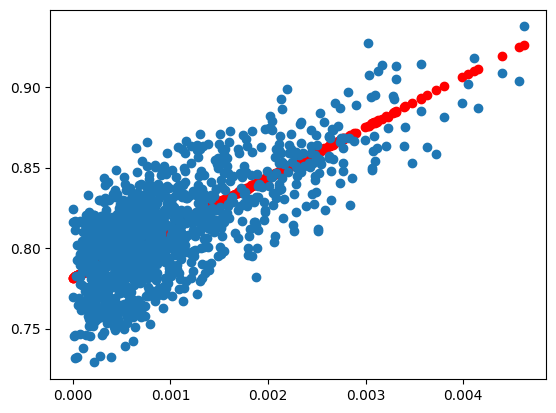

In [ ]:
plt.scatter(X_1['net_sqm'],Y_1_pred, color='red')
plt.scatter(X_1['net_sqm'],Y_1)

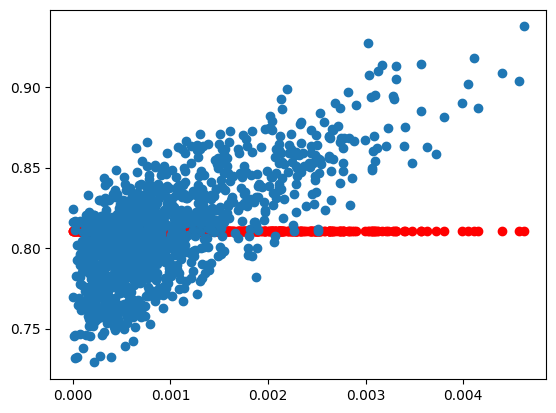

In [ ]:
plt.scatter(X_1['net_sqm'],Y_1_1_pred, color='red')
plt.scatter(X_1['net_sqm'],Y_1)

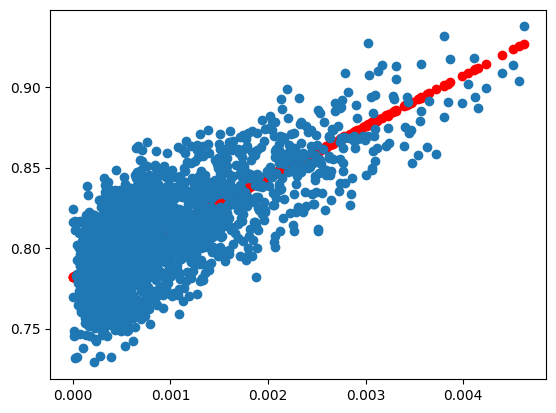

In [ ]:
plt.scatter(X_2['net_sqm'],Y_2_pred, color='red')
plt.scatter(X_2['net_sqm'],Y_2)

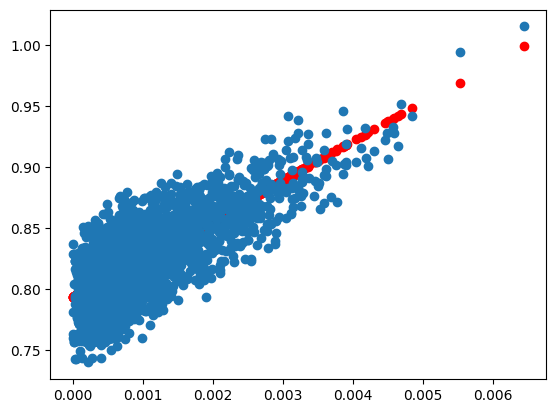

In [ ]:
plt.scatter(X_3['net_sqm'],Y_3_pred, color='red')
plt.scatter(X_3['net_sqm'],Y_3)

Modelo completo

---



In [ ]:
class Regresion:
  def __init__(self,tipo,x,y):
    self.tipo = tipo
    self.columnas_entrada = x
    self.columna_salida = y

# Funciones Fit, validar, Predict

  # Datos | Porcentaje de entrenamiento
  # Iteraciones | Ratio de aprendizaje
  def fit(self, data, train , iter = 20, ratio = 0.1):
    self.exp = division_datos(train,data)
    X = self.exp[0][self.columnas_entrada]
    Y = self.exp[0][self.columna_salida]

    if self.tipo == 'M':
      self.theta = Reg_Matrix(X, Y)
    elif self.tipo == 'L':
      self.theta = Reg_Lin(X, Y, iter, ratio)

  def validar(self):
    X = exp_1[1][self.columnas_entrada]
    Y = exp_1[1][self.columna_salida]
    return ECM(prediccion(self.theta, X), Y)

  def predict (self,datos):
    datos_ = datos.copy()
    datos_.insert(0, 'x0', 1)
    return np.dot(datos_,self.theta)

# Modelos de regresion

  def Reg_Matrix(x_,y):
    x = x_.copy()
    x.insert(0, 'x0', 1)
    theta = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
    return np.reshape(theta,(theta.shape[0],1))

  def Reg_Lin(x,y,itr,ratio):
    len = x.shape[0]
    col = x.shape[0]
    theta = np.zeros(col+1)
    for itrs in range(itr):
      for datos in range(len):
        for i in range(col+1):
          theta[i] -= sum(( theta.T * x - y)*np.reshape((x[:,i]),(len,1)))[i]*ratio/len
    return theta


In [ ]:
modelo = Regresion('M',['net_sqm','bedroom_count'],['price'])
modelo.fit(data,0.7)
modelo.validar()

8525949451.583297

In [ ]:
modelo = Regresion('M',['net_sqm'],['price'])
modelo.fit(data,0.7)
modelo.validar()

8520715752.407716